# English Classifier
I was trying to come up with an interesting experiment in terms of using a Machine Learning Model(Random Forest) in order to make guesses on whether or not a word was an English word. It seems to have low precision, but high recall.
# Data Gathering
The dataset for valid english words was retrieved from https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2006/04/1-10000

I filtered out the words with quotes and periods in them.

I then used a python script in order to generate fake words by randomly picking letters from a-z for each letter of a random length word between 1-16 characters long(the length of the longest word in my English corpus).

I then labeled each word in the datasets as fake or english and then proceeded to convert each word into a csv where each index in the word was a column in the csv. It was then padded with periods to reach 16 characters in length.

Most of the text processing/filtering was performed using vim.

# Why vim?
Vim has amazing context awareness. The movements in vim allow you to move to the first instance of a delimiter and then perform an action and combined with its macro system, you can automate many tedious processes. You can also manipulate text as if it were a 2d file being able to select an entire column and eliminate it from the middle of a text document by using visual block mode. It allows for automation of very tedious manual labor by allowing the user to describe the desired changes that they want performed on the text rather than mechanical motions like move right 3 times(while supporting motions of that kind if necessary)

# Results
Using a random seed of 
```python
np.random.seed(42)
```
I have the following results(accuracy) in my cross_val_score
```python
[0.82957393 0.84210526 0.83709273 0.85213033 0.84711779 0.84634761
 0.88664987 0.86901763 0.86901763 0.84382872]
```

# Remarks
The random forest that I used has high recall, but once you start throwing a lot of vowels into the mix, they begin have low precision. The data generated does not follow the letter breakdown of english.

In [122]:
import pandas as pd
converters= {
    i: (lambda x: ord(x)) for i in range(0, 16)
}
converters.update({ 'language': lambda x: x != 'fake' })
words = pd.read_csv('./datasets/en-fake.csv', converters=converters)

ValueError: cannot copy sequence with size 19898 to array axis with dimension 16

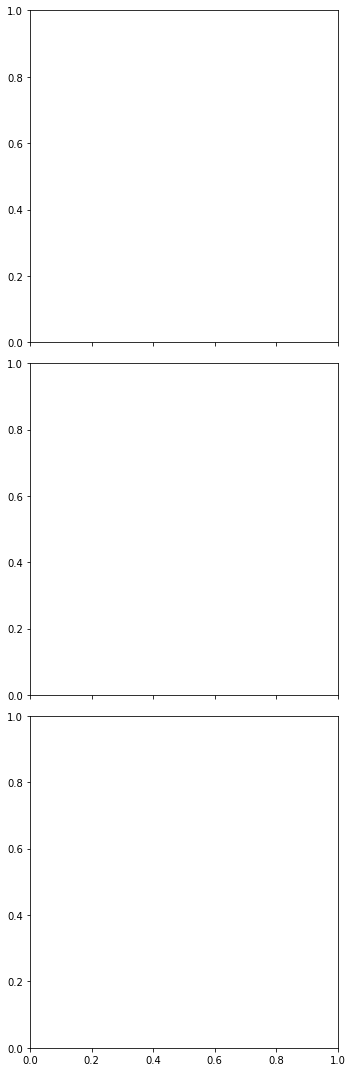

In [158]:
# analytics
%matplotlib inline
import matplotlib.pyplot as plt
_words = words.copy()

col_names = list(_words)[:-1]

# loop to change each column to category type
for col in col_names:
    _words[col] = _words[col].astype('u1',copy=False)

_words.drop('language', axis=1, inplace=True)
'''
_words.hist(
    bins=26, 
    figsize=(20, 16), 
    range=(ord('a'), ord('z')),
)
'''
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(_words, col_names, bins=40)

plt.show()

In [124]:
# build training data

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(words, test_size=0.2, random_state=42)

train_labels = train_set['language']
train_data = train_set.drop('language', axis=1)

test_labels = test_set['language']
test_data = test_set.drop('language', axis=1)

In [125]:
# train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
# evaluate the model
from sklearn.model_selection import cross_val_score
import numpy as np

# need to set up random state here for reproducibility of results
np.random.seed(42)

# test
accuracy = cross_val_score(model, test_data, test_labels,
                               scoring='accuracy', cv=10)
print(accuracy)

[0.82957393 0.84210526 0.83709273 0.85213033 0.84711779 0.84634761
 0.88664987 0.86901763 0.86901763 0.84382872]


In [127]:
# helper functions
def encode_word(word):
    padded_word = [char for char in word] + ['.']*(16-len(word))
    return pd.Series(np.array([ord(char) for char in padded_word]))

def decode_frame(frame):
    return ''.join(chr(i) for i in frame if chr(i) != '.')

In [128]:
# aesthetic test
import numpy as np
cases = []
classification = []
truth = []

options = np.random.permutation(test_labels.size)
for idx in range(min(10, test_data.size)):
    frame = test_data.iloc[options[idx], :]
    true_answer = test_labels.iloc[options[idx]]
    word = decode_frame(frame)
    
    classification.append(model.predict([frame]))
    cases.append(word)
    truth.append(true_answer)

for i in range(len(cases)):
    print(cases[i], 'is', 'not' if not classification[i] else '',  'a word')
    print('correct' if truth[i] == classification[i] else 'WRONG')

pezyvuhncnf is not a word
correct
tirxumggyqmjcvsu is not a word
correct
fijwbmuulmgxx is not a word
correct
lsvggwosmm is not a word
correct
lbrxgrvdypxtrj is not a word
correct
qghbbjqyekxwmoi is not a word
correct
dig is  a word
correct
zklyz is not a word
correct
worn is  a word
correct
prvxydswfi is not a word
correct


In [120]:
def is_word(word):
    frame = encode_word(word)
    is_word = model.predict([frame])
    print('%s is %sa word' %(word, '' if is_word else 'not '))

In [102]:
while(True):
    word = input()
    is_word(word)

hello
hello is a word
goodbye
goodbye is a word
aotehustns
aotehustns is a word
aoetuhrlacoheust
aoetuhrlacoheust is not a word
atoheu
atoheu is a word
thuoetha
thuoetha is a word
tnoheu
tnoheu is a word
ontheu
ontheu is a word
uhtneokn
uhtneokn is a word
tnoheunth
tnoheunth is a word
ntoheunt
ntoheunt is a word
ththjkt
ththjkt is a word
jnkhtnjkh
jnkhtnjkh is a word
jtnhknhjntk
jtnhknhjntk is not a word
nthjknthntjhk
nthjknthntjhk is not a word
tnjhn=
tnjhn= is a word
ntjhk
ntjhk is not a word
tjnkh
tjnkh is a word
jthkn
jthkn is not a word
dvorak
dvorak is a word
chinese
chinese is a word
sneak
sneak is a word
qjkcrhk
qjkcrhk is not a word


KeyboardInterrupt: 

In [103]:
# this thing seems very sensitive to vowels. 
# my dvorak keyboard gives me an extremely biased amount of vowels when I spam keys

In [3]:
# postmortems

# reload
import pandas as pd
words = pd.read_csv('./datasets/en-fake.csv')

In [5]:
# analytics
# TODO for later when I atually learn how to do a 2d histogram
# I think that building more representative random data might lead to better results
# letter frequency and position might be useful to try to ML out

%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter

count = []
english_words = words[words.language == 'english']
fake_words = words[words.language == 'fake']

english_words.drop('language', axis=1, inplace=True)
fake_words.drop('language', axis=1, inplace=True)

english_words = english_words.transpose()
print(english_words)

indices = [i for i in range(0, 16)]
letters = [ord(i) for i in 'abcdefghijklmnopqrstuvwxyz']

plt.hist2d(indices, letters)
plt.show()

   0    1    2    3    4    5    6    7    8    9     ... 9838 9839 9840 9841  \
0     t    o    a    t    i    i    t    w    h    h  ...    p    s    s    e   
1     h    f    n    o    n    .    h    a    i    e  ...    u    y    i    x   
2     e    .    d    .    .    .    a    s    s    .  ...    r    r    g    p   
3     .    .    .    .    .    .    t    .    .    .  ...    i    i    n    e   
4     .    .    .    .    .    .    .    .    .    .  ...    f    a    i    r   
5     .    .    .    .    .    .    .    .    .    .  ...    i    n    f    i   
6     .    .    .    .    .    .    .    .    .    .  ...    e    .    i    m   
7     .    .    .    .    .    .    .    .    .    .  ...    d    .    c    e   
8     .    .    .    .    .    .    .    .    .    .  ...    .    .    a    n   
9     .    .    .    .    .    .    .    .    .    .  ...    .    .    n    t   
10    .    .    .    .    .    .    .    .    .    .  ...    .    .    t    a   
11    .    .    .    .    . 

AttributeError: 'list' object has no attribute 'all'